![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import datasets, svm
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split

![title](https://www.researchgate.net/publication/307087929/figure/fig6/AS:399685689856008@1472303902570/For-cross-validation-and-cross-testing-data-are-divided-into-two-separate-sets-only.png)

## Cross validation

In the previous discussion, we left the validation set a bit apart. This is the moment to cope with it.

The train/test split may introduce an error, due to the fact that we may exclude data that are crucial for the algorithm. For example, think about a binary classification problem, in the case the slit completely excludes a class.

This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

In order to avoid this, we can perform something called __cross validation__. It is very similar to train/test split, but it is applied to more subsets. Meaning, we split our data into $k$ subsets, and train on $k-1$ one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.

There are several cross validation methods, we are going to go over two of them: the first is _K-Folds Cross Validation_ and the second is _Leave One Out Cross Validation_ (LOOCV).

### K-fold cross validation

In $K$-Folds Cross Validation we split our data into $k$ different subsets (or folds). We use $k-1$ subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

![title](https://miro.medium.com/max/1400/1*J2B_bcbd1-s1kpWOu_FZrg.png)

#### Example

To have a concrete idea about how this works, we take an example directly from [sklearn documentation for $k$-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [2]:
from sklearn.model_selection import KFold # import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array

kf = KFold(n_splits=3) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf)

KFold(n_splits=3, random_state=None, shuffle=False)


One can print out the folds.

In [3]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


As one can see, the function split the original data into different subsets of the data. 
This is a very simple example, but it explains the concept pretty well.

## Leave One Out Cross Validation (LOOCV)

Another method we want to analyse is the so-called [Leave One Out Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like $k$-fold.

Again, let's take as example the one from [`sklearn` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

In [4]:
from sklearn.model_selection import LeaveOneOut # Import LeaveOneOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
loo = LeaveOneOut()
loo.get_n_splits(X)

4

In [5]:
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('X_train: ', X_train, 'X_test: ', X_test, 'y_train: ', y_train, 'y_test: ', y_test)
    print('='*25)

TRAIN: [1 2 3] TEST: [0]
X_train:  [[3 4]
 [5 6]
 [7 8]] X_test:  [[1 2]] y_train:  [2 3 4] y_test:  [1]
TRAIN: [0 2 3] TEST: [1]
X_train:  [[1 2]
 [5 6]
 [7 8]] X_test:  [[3 4]] y_train:  [1 3 4] y_test:  [2]
TRAIN: [0 1 3] TEST: [2]
X_train:  [[1 2]
 [3 4]
 [7 8]] X_test:  [[5 6]] y_train:  [1 2 4] y_test:  [3]
TRAIN: [0 1 2] TEST: [3]
X_train:  [[1 2]
 [3 4]
 [5 6]] X_test:  [[7 8]] y_train:  [1 2 3] y_test:  [4]


## Further Cross Validation methods

We presented two of the most used approaches to cross validation. However, one can check further methods on the [`sklearn` documentation webpage](https://scikit-learn.org/stable/modules/classes.html).

## Working Example

Let’s check out the example from the last lecture, this time with using cross validation.
We will use the `cross_val_predict` function to return the predicted values for each data point when it is in the testing slice.

First of all, let's load the dataset.

In [6]:
diabetes = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target
X = df_diabetes.loc[:, diabetes.feature_names]
y = df_diabetes.target

In [7]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [8]:
# create training and testing sets, ratio 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Let's calculate the model score.

In [10]:
model.score(X_test, y_test)

0.5422423897281534

Text(0, 0.5, 'Predictions')

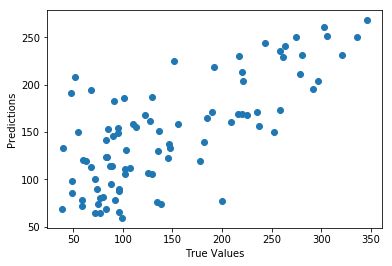

In [11]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [12]:
# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


As you can see, the last fold improved the score of the original model — from $0.455$ to $0.569$. 
Not an amazing result, but hey, we will take what we can get :)

Now, let's make new predictions and plot the result.

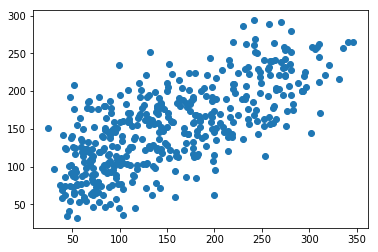

In [13]:
# Make cross validated predictions
y_pred_cv = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, y_pred_cv)

__Question__: How the plot above is different from the previous one?

> It is very different from the original plot. First of all, it is six times as many points as the original plot because we used cv=6.

Finally, one can check the [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) or $R^2$-score of the model.

Roughly speaking, the $R^2$-score is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate and predictive is our model.

In [14]:
accuracy = r2_score(y, y_pred_cv)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.4908065838640776


## Error Metrics

Until now, we evaluated our algorithms using _accuracy_, meaning how many right answers our algorithm is able to predict correctly.

Concretely,

$$ A = \frac{y_{pred}}{y} \, .$$

Let's study the following example.

We want to predict whether someone has a cancer or not. Training a logistic regression, we find out that we get a $1\%$ error on the test set, meaning we make $99\%$ of correct diagnosis.

However, in our dataset we have that only $0.3\%$ of patients have cancer.

Thus, let's consider the following "prediction" algorithm.

```python
    def is_cancer(x):
        y = 0 # No matter the value of x
        return y
```

__Question__: Can you calculate the accuracy of such a model? How many correct diagnosis it will return?

In most cases, we are not only interested in how many correct (positive) answers we get, but also in how many negative answers are predicted positive/negative.

In order to get these scores, we have to define different __error metrics__. Some of them have already been used above (like $R^2$-score, accuracy, etc.)

For a binary classification problem, these are the most common. One can find a numerous set of metrics in the [`sklearn` documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

* [Precision](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [$F_1$-score](https://en.wikipedia.org/wiki/F1_score)
* [ROC-AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

#### Precision and Recall

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png)

These are faces of the same coin. 

Indeed, __precision__ is the fraction of true positives (_i.e._ y = 1 and y_pred = 1) over the total number of predicted positives (y_pred = 1).

On the other hand, __recall__ is the fraction of true positives (_i.e._ y = 1 and y_pred = 1) over the total number of actual positives (y = 1).

In our oncological example, we can rephrase as follows,

* __Precision__: Of all patients we predicted have cancer, what fraction actually has a cancer?
* __Recall__: Of all patients that actually have a cancer, what fraction we correctely predict having a cancer?

Using such metrics, in our example we have for the logistic regression algorithm

|Model | Precision | Recall |
|--|---|----|
|__logistic regression__ | 80% | 70% | 
|__deterministic__ | 99.7% | 0.3% |


We now have a numeric measure to determine when an algorithm is good or not, even in a tough case like the one above.

#### $F_1$-score

A metric that combines the scores from _precision_ and _recall_ is the so-called $F_1$-score, defined as follows,

$$ F_1 = 2 \frac{P R}{P+R}\, ,$$

__Question__: Calculate the $F_1$ scores of both algorithms above.

## Confusion Matrix

We can put the concepts above into a matrix. 

For a binary classification problem, like the cancer diagnosis one, we may put in one axis the true labels vs the predicted ones.

First of all, let's load the dataset.

In [15]:
cancer = datasets.load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df_cancer['target'] = cancer.target
X = df_cancer.loc[:, cancer.feature_names]
y = df_cancer.target

Split data into training and test sets.

In [16]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Then let's fit the model

In [17]:
model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = model.predict(X_test)

In [19]:
class_names = cancer.target_names

At this stage, we can make use of the `confusion_matrix` method of `sklearn` to compute confusion matrix for our model.

In [20]:
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[52  1]
 [ 6 84]]


This is already the result. One can see in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) the meaning of numbers. 

* The $(1,1)$ entry is the number of _Real Positives_, that is $y_{pred} = y_{test} = 1$.
* The $(1,2)$ entry is the number of _False Negatives_, that is  $y_{pred} = 0$, $y_{test} = 1$.
* The $(2,1)$ entry is the number of _False Positives_, that is  $y_{pred} = 1$, $y_{test} = 0$.
* The $(2,2)$ entry is the number of _Real Negatives_, that is  $y_{pred} = y_{test} = 0$.

It might be useful (and nicer) to transform this array into something more immediate and understandable.
There are two steps one can do. The first one is transform the non-normalised numbers into relative quantitities.

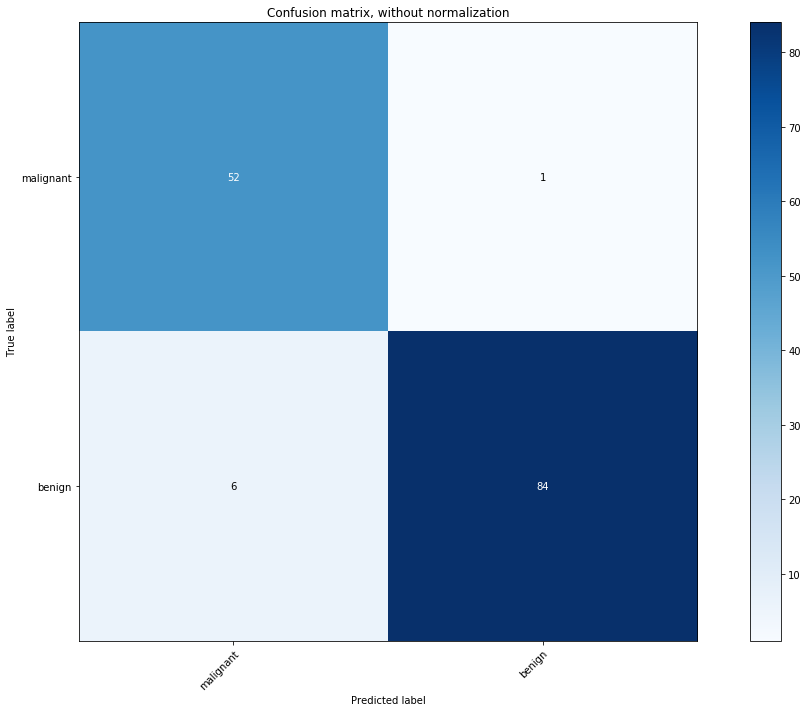

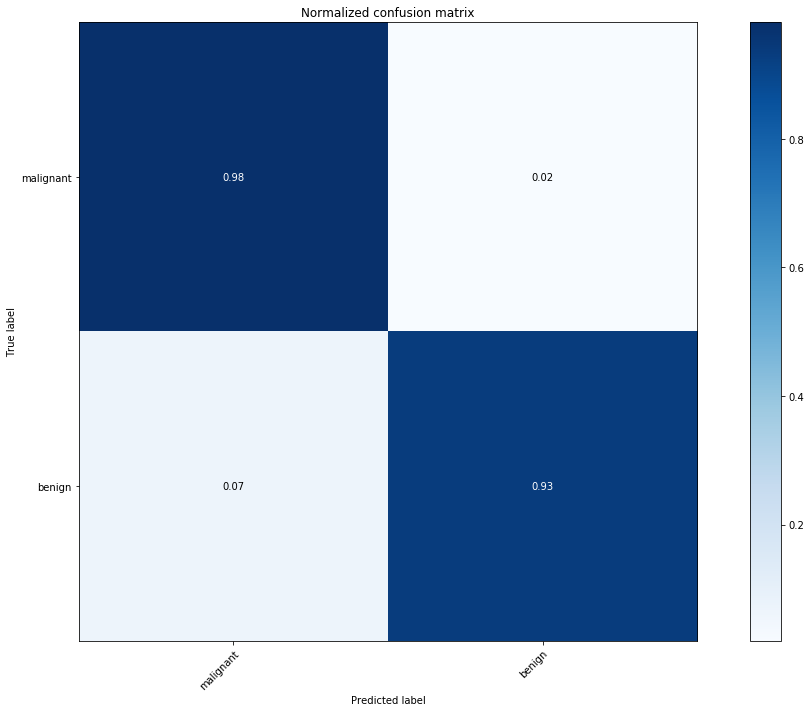

In [21]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (15,10) # Change the default figure size
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

It is immediate from the confusion matrix to calculate precision and recall, and so $F_1$-score.

## Exercise

Compute and plot the confusion matrix for the iris dataset of the following classification algorithms

1. `LogisticRegression`
2. `NaiveBayes`
3. `DecisionTreeClassifier`
4. `RandomForestClassifier`
5. `SVC`
6. `LinearSVC`

## Why do we do this? Model Selection problem

A curious reader may wonder the reason behind all these efforts to define measure to evaluate algorithm perfomances.
Well, imagine you have a dataset to classify and you have to decide qhich is the best classification algorithm, and which parameters of the model you have to use. The answer is given by using error metrics to perform a model selection.

To start, as we have seen, in `sklearn` every estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data. Keep in mind: _Bigger is better_.

In [22]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target
X = df_iris.loc[:, iris.feature_names]
y = df_iris.target
class_names = iris.target_names

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [72]:
SVM = svm.SVC(gamma='scale')
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
print('Score: %.3f %%' %SVM.score(X_test, y_test))

Score: 0.933 %


__Question__: which error metric the score above corresponds to?

Let's compare with another classifier.

In [35]:
RandFrst = RandomForestClassifier(n_estimators = 10)
RandFrst.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print('Score: %.3f %%' %RandFrst.score(X_test, y_test))

Score: 0.933 %


One can compare the confusion matrices to have a more precise point of view.

In [74]:
y_pred_SVM = SVM.predict(X_test)
y_pred_RF = RandFrst.predict(X_test)

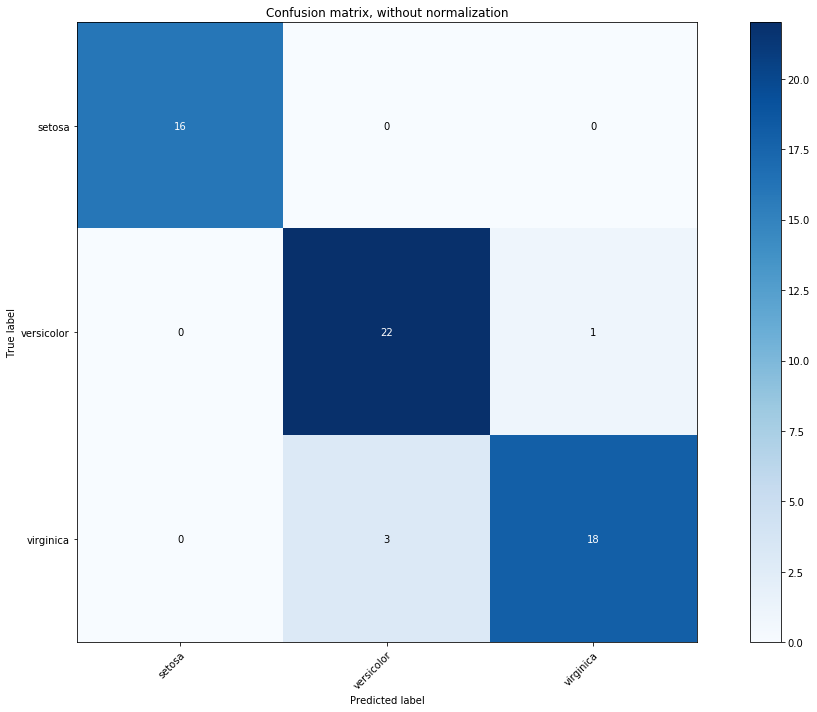

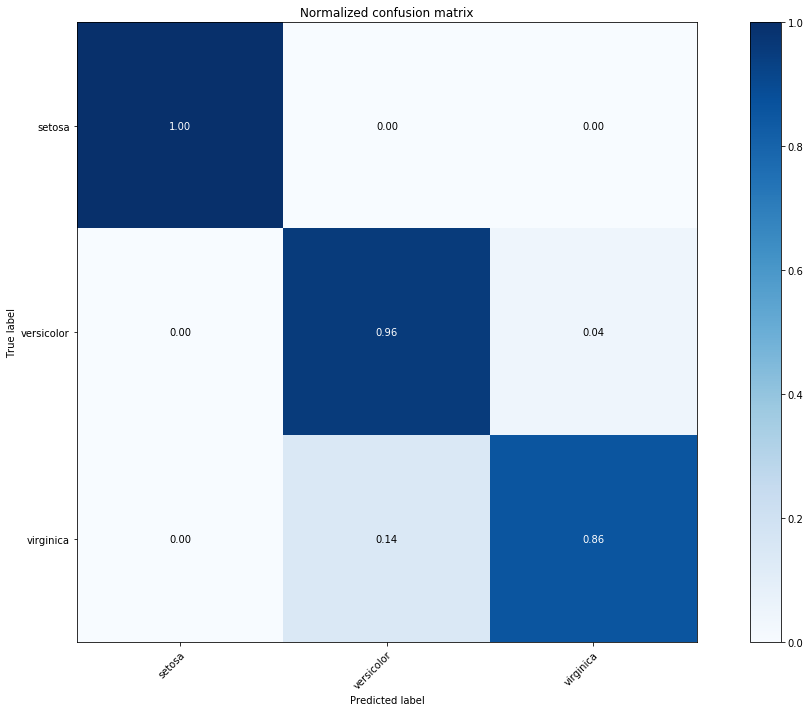

In [75]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_SVM, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_SVM, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

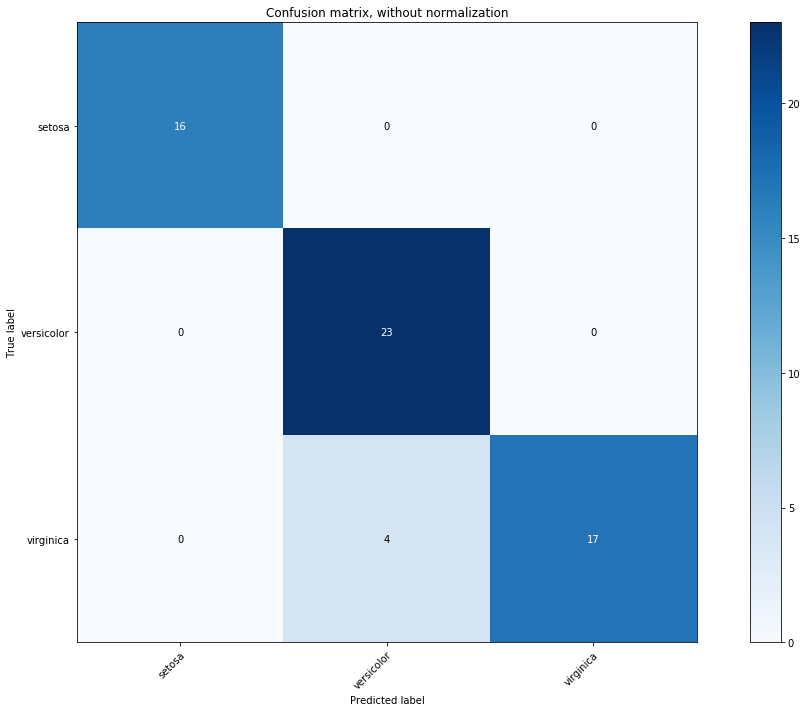

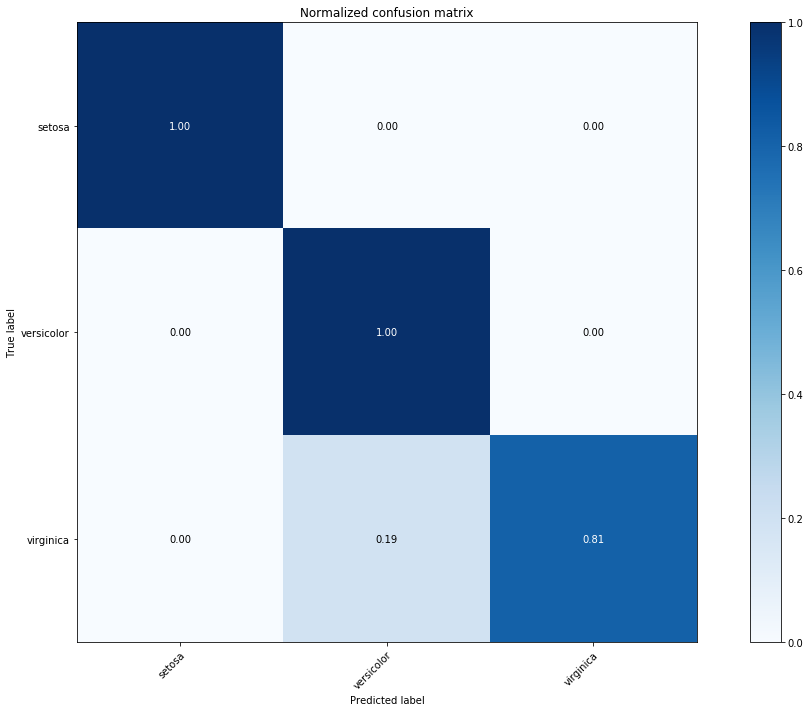

In [66]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Both are quite accurate, however, the `RandomForestClassifier` has a parameter: the number of estimators. How do we choose the best one?

The easier method is to use `cross_val_score`. By default it uses the same metric of the estimator `score`, to change it we use the `scoring` parameter.

In [61]:
estimators = np.linspace(5,120, dtype=int)

scores = []

for n in estimators:
    clf = RandomForestClassifier(n_estimators=n)
    score = cross_val_score(clf, X_train, y_train, cv=15, scoring='f1_micro')
    scores.append(np.mean(score))

And now we can plot the scores we got for different estimator numbers.

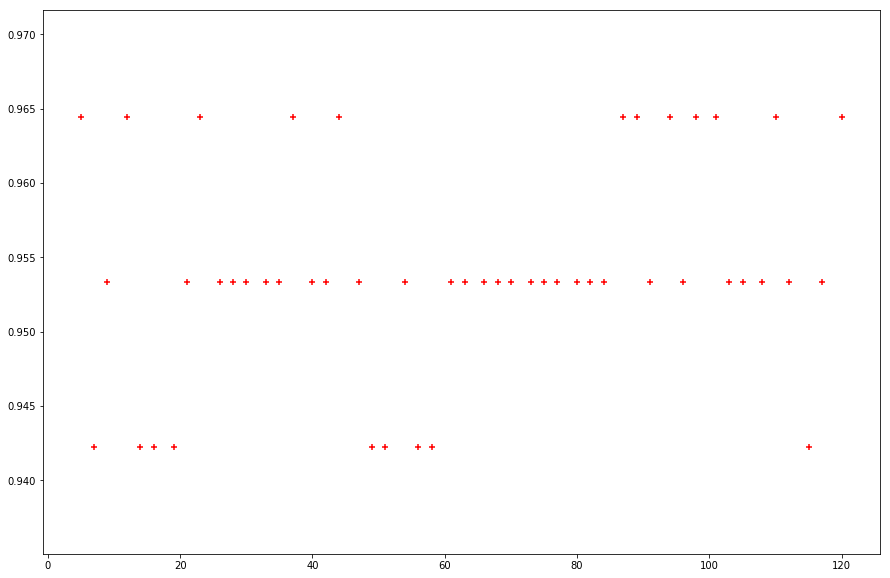

In [62]:
plt.scatter(estimators, scores, marker='+', c = 'r');